In [ ]:
# Install Essential Libraries
%pip install ultralytics

In [1]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

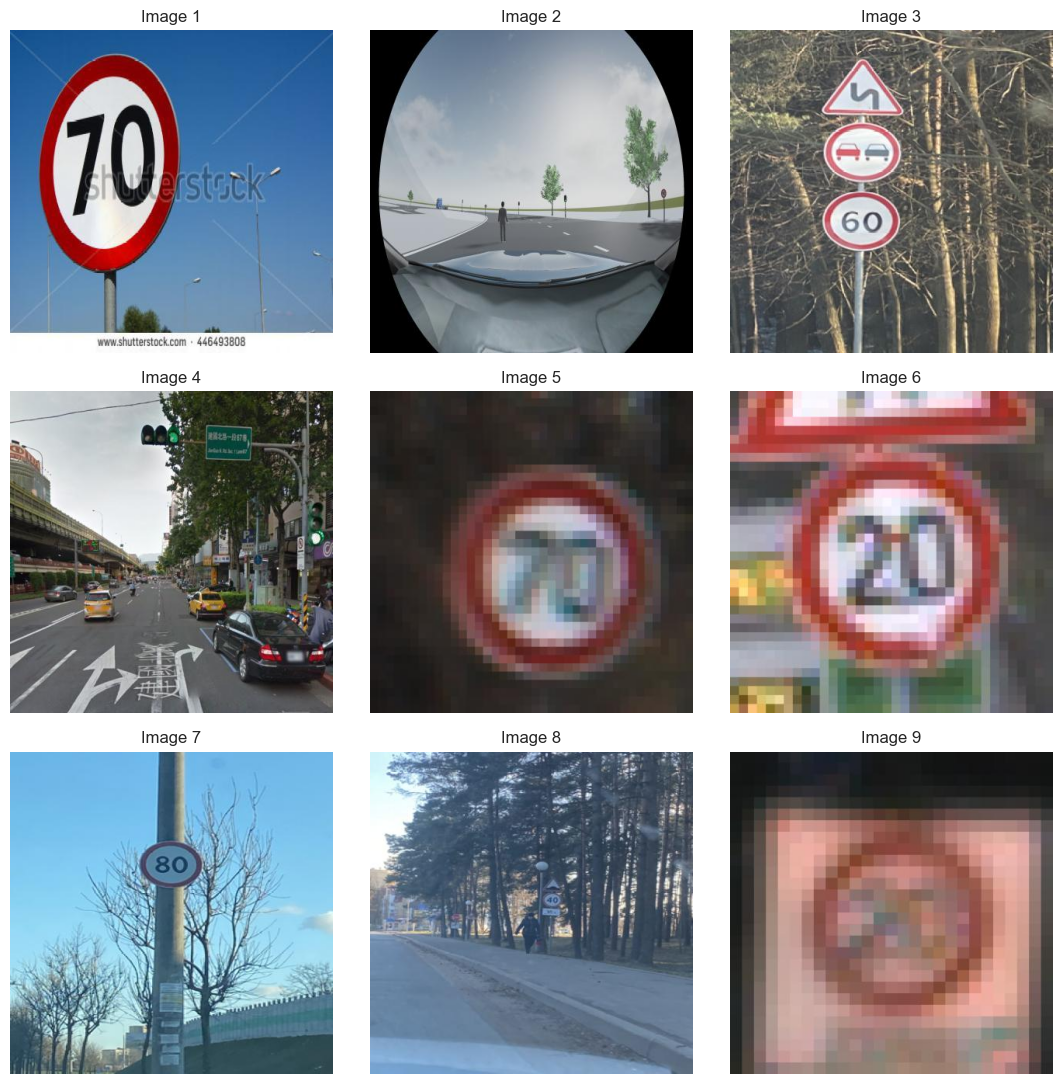

In [ ]:
Image_dir = 'C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/car/train/images'
# 'C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/car/train/images'
# C:\Users\Casper\Desktop\DORUK_SEZER\_4.SINIF_1_DÖNEM\Bitirme_Projesi_1\Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection\car\train\images
# C:/Users/Casper/Desktop
num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 C:\Users\Casper\Desktop\DORUK_SEZER\_4.SINIF_1_DNEM\Bitirme_Projesi_1\Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 169.0ms
Speed: 20.8ms preprocess, 169.0ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)


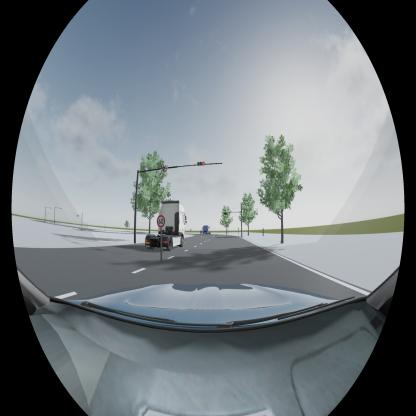

In [11]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')


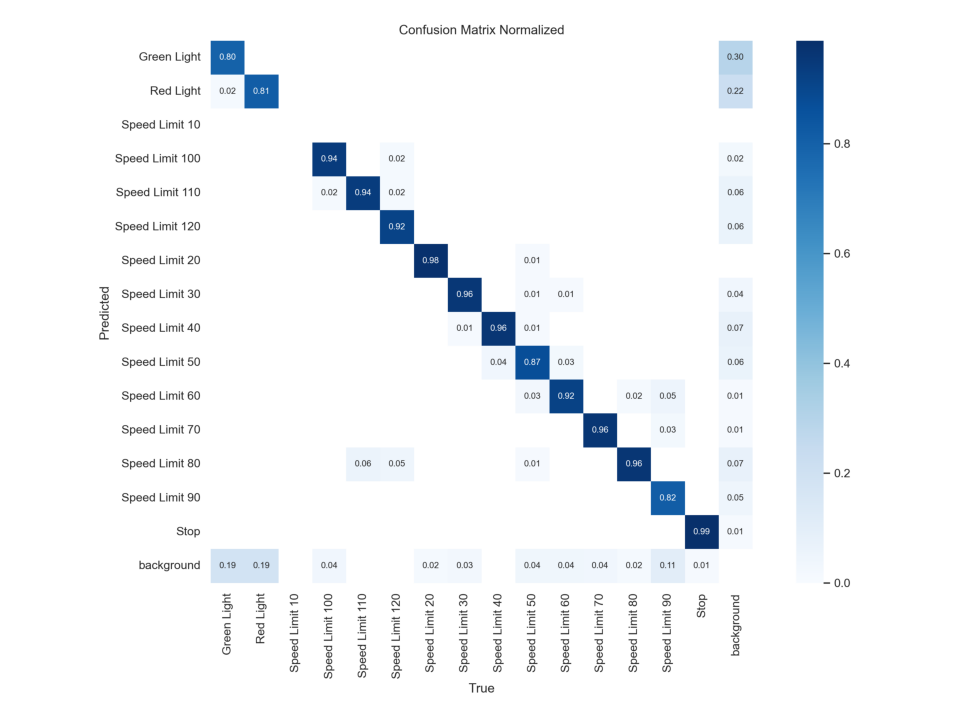

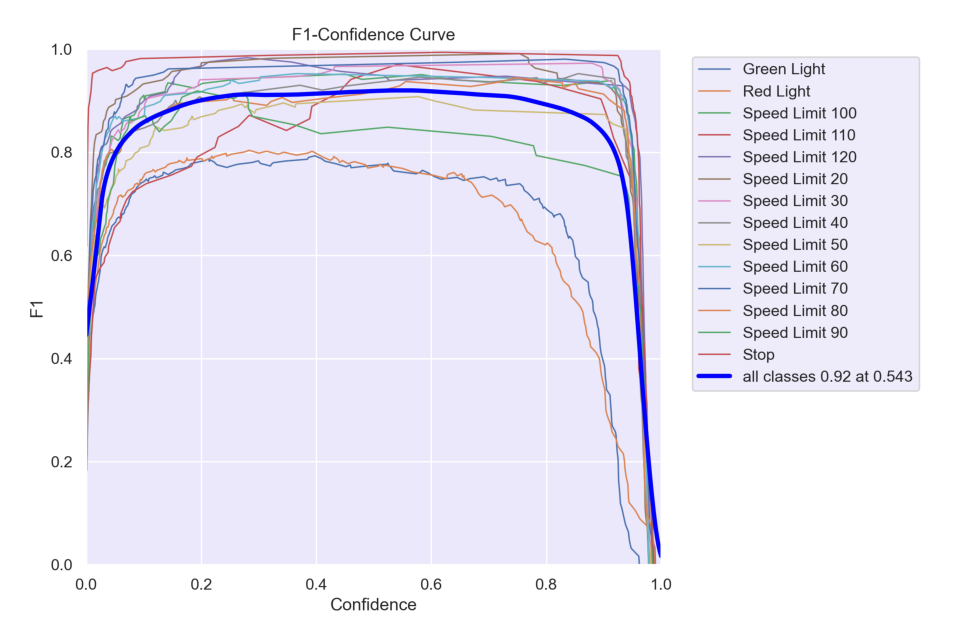

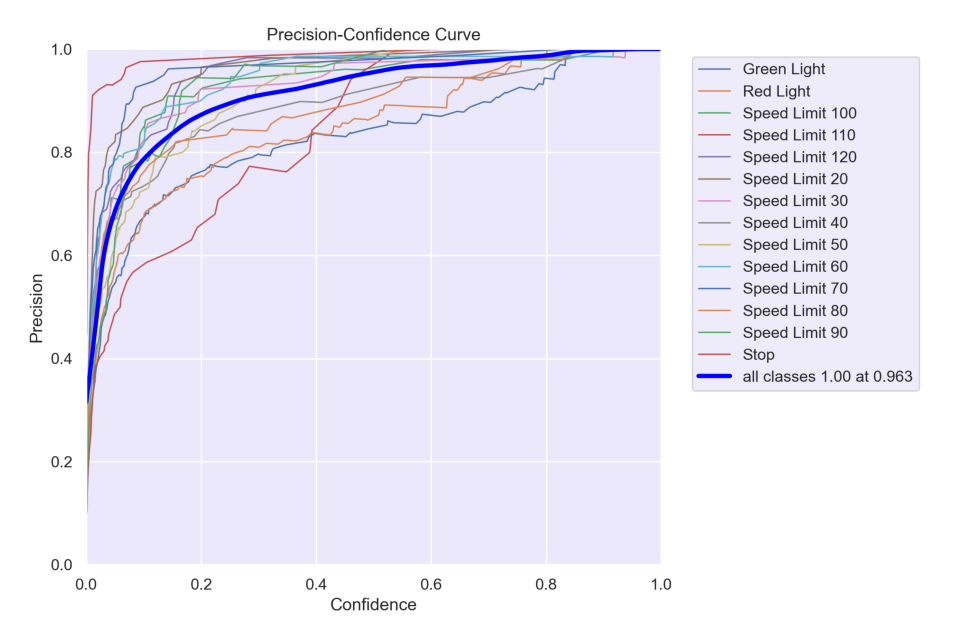

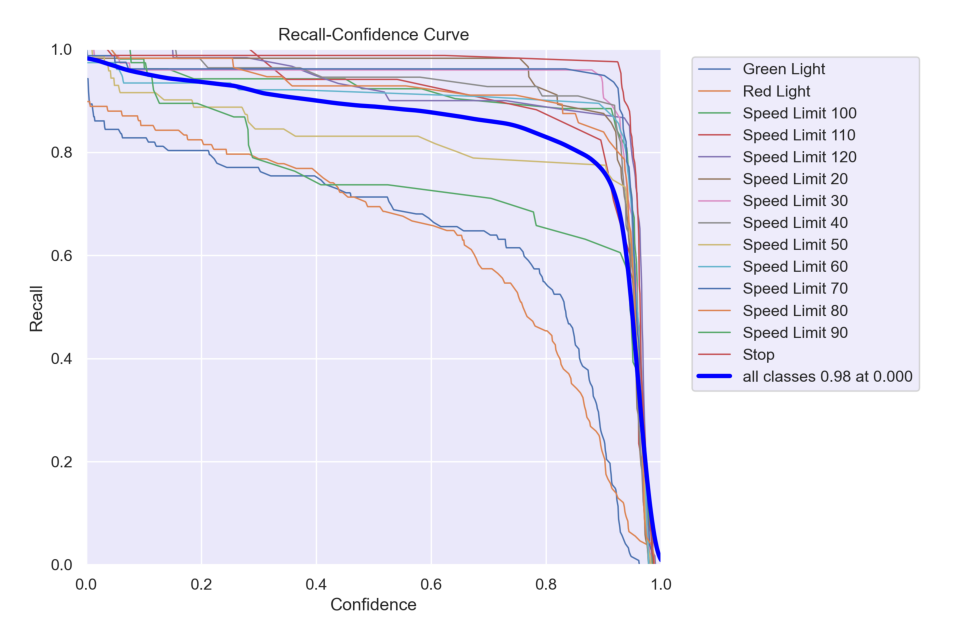

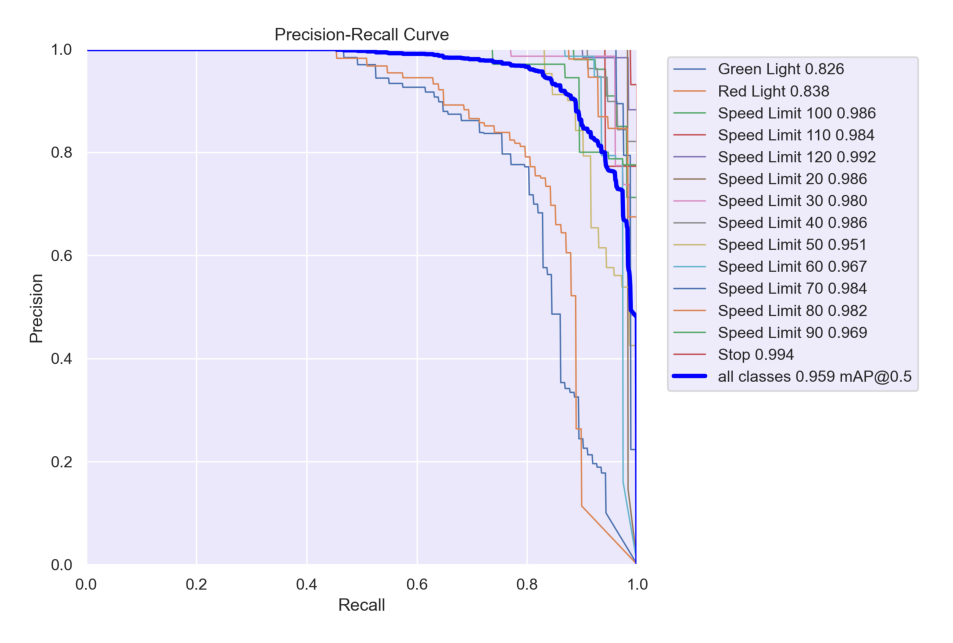

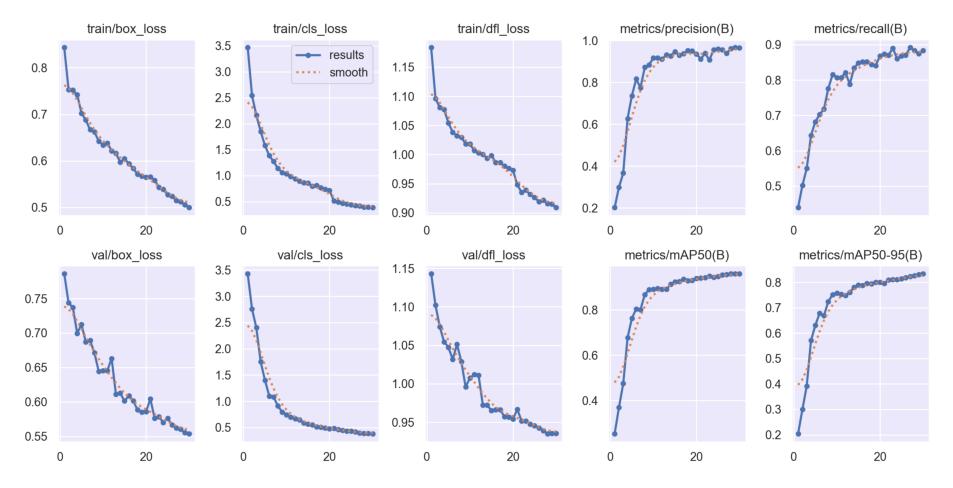

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]
# C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama
# Path to the directory containing the images
post_training_files_path = 'C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/runs/detect/train3'

# Display the images
display_images(post_training_files_path, image_files)


In [9]:
Result_Final_model = pd.read_csv('C:/Users/Casper/Desktop/DORUK_SEZER/_4.SINIF_1_DÖNEM/Bitirme_Projesi_1/Bitirme_2_Rapor_Uygulama_Yolo_traffic_sign_detection/runs/detect/train3/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
20,21,30815.4,0.56569,0.51509,0.94809,0.91231,0.87350,0.93948,0.79619,0.60436,0.48098,0.96658,0.000179,0.000179,0.000179
21,22,32304.9,0.55843,0.49537,0.93516,0.93851,0.87042,0.94254,0.80978,0.57606,0.45932,0.95163,0.000161,0.000161,0.000161
22,23,33795.5,0.54315,0.47185,0.93885,0.90733,0.88998,0.94838,0.81096,0.57834,0.44509,0.95175,0.000144,0.000144,0.000144
23,24,35303.9,0.53876,0.45791,0.93155,0.95619,0.86014,0.94381,0.81156,0.57033,0.43575,0.94758,0.000127,0.000127,0.000127
24,25,36851.0,0.52742,0.43821,0.92625,0.95956,0.86860,0.94663,0.81409,0.57608,0.43110,0.94570,0.000109,0.000109,0.000109
25,26,38366.4,0.52419,0.42228,0.91932,0.95598,0.87037,0.95369,0.81938,0.56681,0.41499,0.94255,0.000092,0.000092,0.000092
26,27,39887.3,0.51453,0.41784,0.92167,0.93927,0.89170,0.95517,0.82292,0.56243,0.39921,0.93908,0.000075,0.000075,0.000075
27,28,41422.7,0.51213,0.39688,0.91607,0.96081,0.88355,0.95816,0.82634,0.56054,0.38643,0.93492,0.000057,0.000057,0.000057
28,29,42962.7,0.50602,0.39563,0.91526,0.96632,0.87505,0.95873,0.83165,0.55525,0.38495,0.93525,0.000040,0.000040,0.000040
29,30,44488.4,0.49942,0.38414,0.90886,0.96479,0.88345,0.95895,0.83399,0.55380,0.38109,0.93549,0.000023,0.000023,0.000023


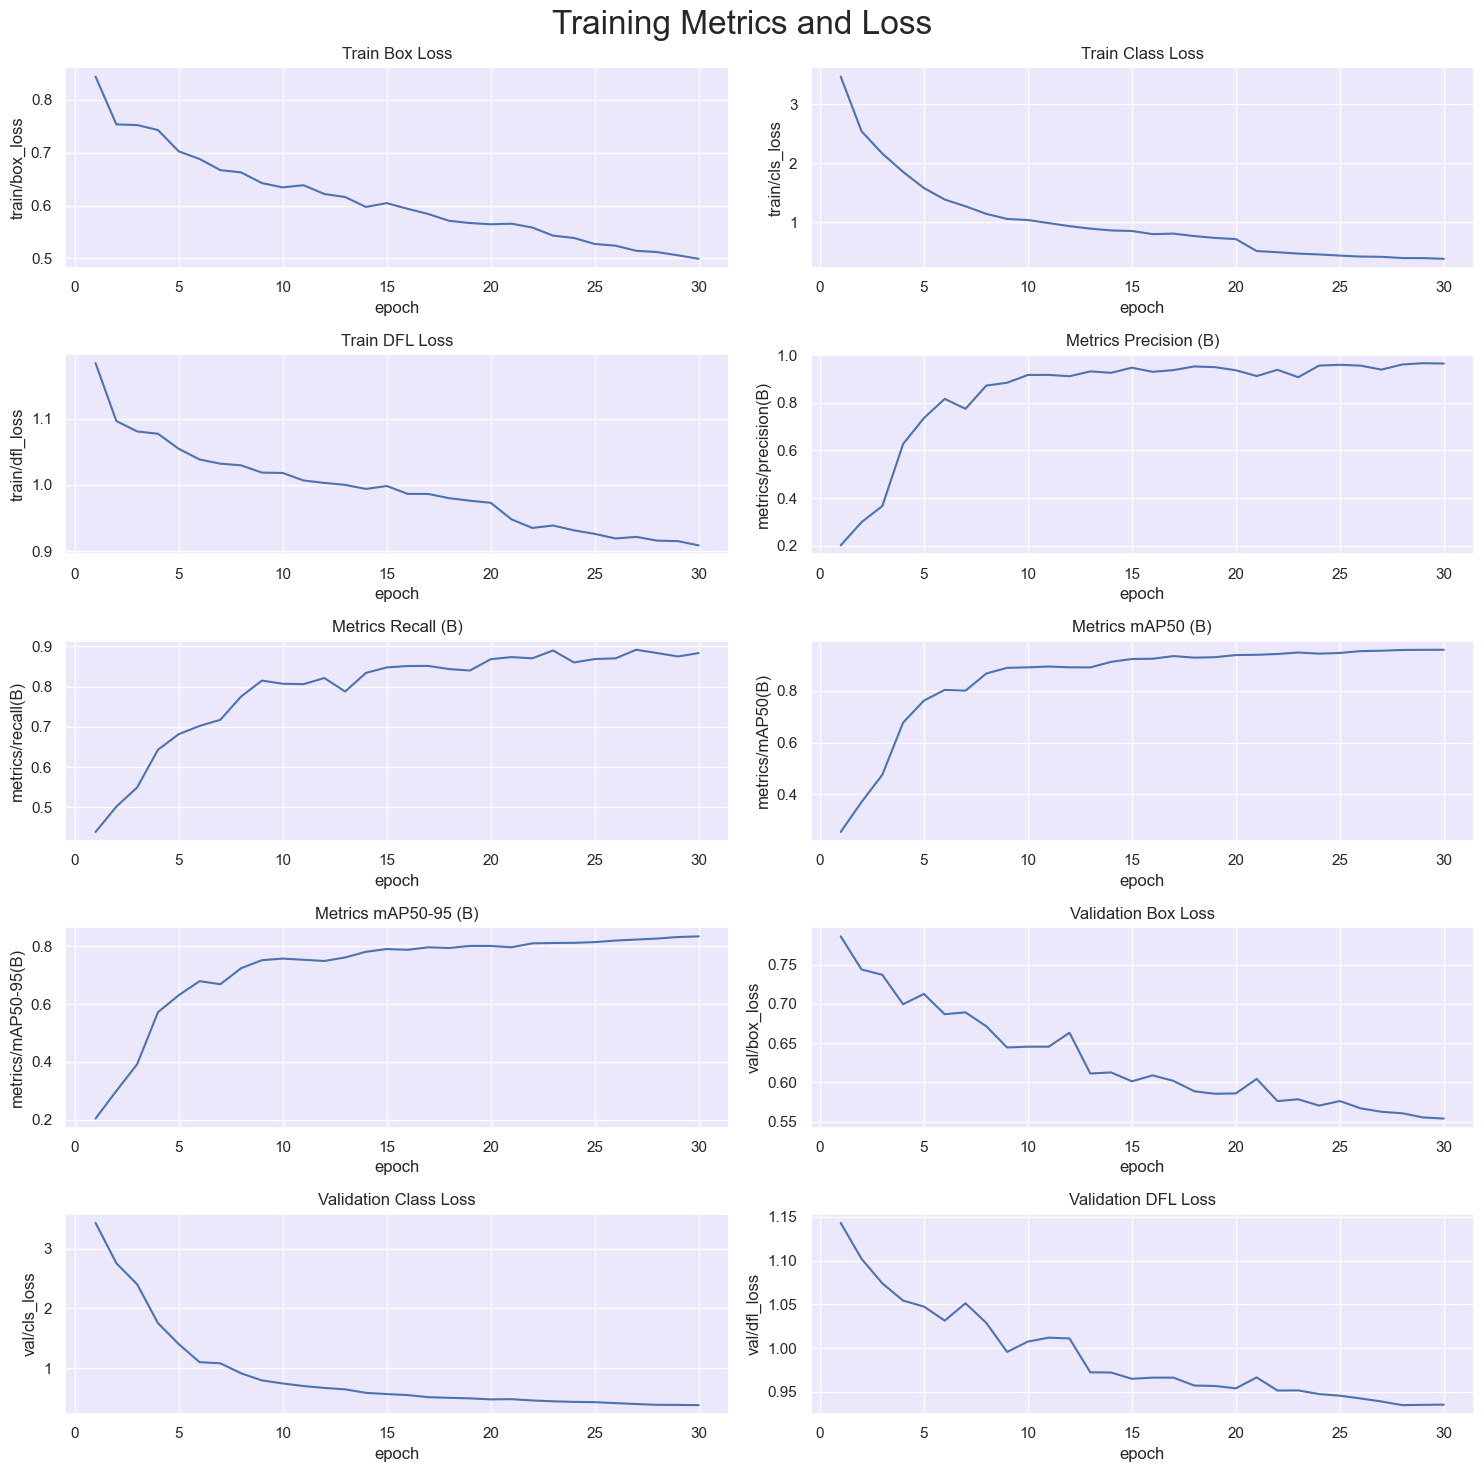

In [10]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()